## split into X,y training and testing data
PTS_TOTAL_OVER_SB is 1 if the game points total was over or 0 if it was under.

In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

'''
split into testing and training data

PTS_TOTAL_OVER_SB is the outcome column (1=over, 0=under)
'''

csv_input = input('Which set should be used in predicting?\n 1.Normal data \n 2.Replace missing scorebook values with random \n 3.Replace all scorebook values with fixed number?');

if csv_input == '1':
    csv_string = 'prediction_data_unreplaced.csv';
elif csv_input == '2':
    csv_string = 'prediction_data_replace_random_sb.csv';
elif csv_input == '3':
    csv_string = 'prediction_data_fixed_sb.csv';
else:
    csv_string = '';
    
df = pd.read_csv('../output_files/' + csv_string).dropna(axis=1).dropna(axis=0)

remove_cols = ['PTS_TOTAL_OVER_SB', 'PTS_TOTAL'];
X = df.drop(columns=remove_cols)

y = df['PTS_TOTAL_OVER_SB']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

Which set should be used in predicting?
 1.Normal data 
 2.Replace missing scorebook values with random 
 3.Replace all scorebook values with fixed number?3


In [35]:
# percentage of y value
df['PTS_TOTAL_OVER_SB'].value_counts(normalize=True).mul(100).astype(str)+'%'

PTS_TOTAL_OVER_SB
False    50.64623338257016%
True     49.35376661742984%
Name: proportion, dtype: object

In [23]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    classification_report,
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
)
from sklearn.model_selection import KFold, cross_val_score 

## Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 1600, min_samples_split = 10, min_samples_leaf = 1, max_features = 'sqrt', max_depth = None, bootstrap = True)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, rf_pred)
print("Accuracy:", accuracy)

clf_rep_rf = classification_report(y_test, rf_pred, output_dict=True)
pd.DataFrame(clf_rep_rf).T

Accuracy: 0.6522140221402214


,precision,recall,f1-score,support
False,0.698031,0.571685,0.628571,558.000000
True,0.618820,0.737643,0.673027,526.000000
accuracy,0.652214,0.652214,0.652214,0.652214
macro avg,0.658425,0.654664,0.650799,1084.000000
weighted avg,0.659594,0.652214,0.650143,1084.000000


<Axes: >

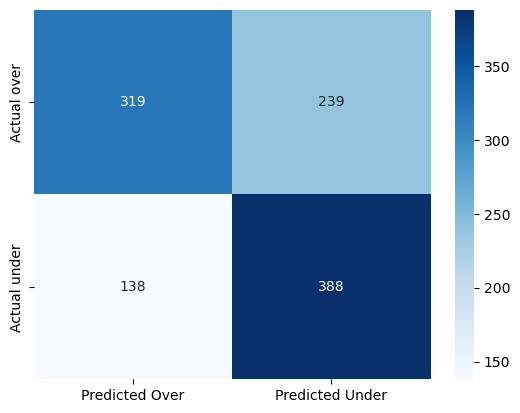

In [25]:
cm = np.array(confusion_matrix(y_test, rf_pred, labels=[0,1]))
confusion = pd.DataFrame(cm, index=['Actual over', 'Actual under'], columns=['Predicted Over', 'Predicted Under'])
sns.heatmap(confusion,annot=True,fmt='g',cmap=plt.cm.Blues)

In [29]:
y_test.shape

(1084,)

### Cross validate the Random Forest results

In [30]:
#cvscores_rf_balanced_accuracy = cross_val_score(rf_clf, X, y, cv = k_folds, scoring = 'balanced_accuracy')
#cvscores_rf_top_k_accuracy = cross_val_score(rf_clf, X, y, cv = k_folds, scoring = 'top_k_accuracy')
#cvscores_rf_average_precision = cross_val_score(rf_clf, X, y, cv = k_folds, scoring = 'average_precision')
#cvscores_rf_precision_score = cross_val_score(rf_clf, X, y, cv = k_folds, scoring = 'precision_score')
#cvscores_rf_recall_score = cross_val_score(rf_clf, X, y, cv = k_folds, scoring = 'recall_score')                                                
#cvscores_rf_neg_brier_score = cross_val_score(rf_clf, X, y, cv = k_folds, scoring = 'neg_brier_score')

In [31]:
from sklearn.model_selection import KFold, cross_val_score

rf_clf = RandomForestClassifier(n_estimators = 1600, min_samples_split = 10, min_samples_leaf = 1, max_features = 'sqrt', max_depth = None, bootstrap = True)

k_folds = KFold(n_splits = 5)

#### Accuracy scores

In [32]:
cvscores_rf_accuracy = cross_val_score(rf_clf, X, y, cv = k_folds, scoring = 'accuracy')

print("Accuracy:\n")
print("Cross Validation Scores: ", cvscores_rf_accuracy)
print("Average CV Score: ", cvscores_rf_accuracy.mean())
print("Number of CV Scores used in Average: ", len(cvscores_rf_accuracy))

print("%0.2f accuracy with a standard deviation of %0.2f" % (cvscores_rf_accuracy.mean(), cvscores_rf_accuracy.std()))


Accuracy:

Cross Validation Scores:  [0.61254613 0.53277932 0.60480148 0.65189289 0.7322253 ]
Average CV Score:  0.6268490219528234
Number of CV Scores used in Average:  5
0.63 accuracy with a standard deviation of 0.07


#### Neg Brier Scores

In [62]:
cvscores_rf_negbrier = cross_val_score(rf_clf, X, y, cv = k_folds, scoring = 'neg_brier_score')

print("Precision:\n")
print("Cross Validation Scores: ", cvscores_rf_negbrier)
print("Average CV Score: ", cvscores_rf_negbrier.mean())
print("Number of CV Scores used in Average: ", len(cvscores_rf_negbrier))

print("%0.2f Neg Brier Score with a standard deviation of %0.2f" % (cvscores_rf_negbrier.mean(), cvscores_rf_negbrier.std()))


Precision:

Cross Validation Scores:  [-0.23841452 -0.25876515 -0.24036415 -0.22675918 -0.19245346]
Average CV Score:  -0.23135129149574754
Number of CV Scores used in Average:  5
-0.23 Neg Brier Score with a standard deviation of 0.02


#### Precision scores

In [63]:
cvscores_rf_precision = cross_val_score(rf_clf, X, y, cv = k_folds, scoring = 'precision')

print("Precision:\n")
print("Cross Validation Scores: ", cvscores_rf_precision)
print("Average CV Score: ", cvscores_rf_precision.mean())
print("Number of CV Scores used in Average: ", len(cvscores_rf_precision))

print("%0.2f precision with a standard deviation of %0.2f" % (cvscores_rf_precision.mean(), cvscores_rf_precision.std()))


Precision:

Cross Validation Scores:  [0.68483412 0.5440613  0.6463964  0.63093146 0.08870968]
Average CV Score:  0.5189865916839931
Number of CV Scores used in Average:  5
0.52 precision with a standard deviation of 0.22


#### Recall scores

In [64]:
cvscores_rf_recall = cross_val_score(rf_clf, X, y, cv = k_folds, scoring = 'recall')

print("Recall:\n")
print("Cross Validation Scores: ", cvscores_rf_recall)
print("Average CV Score: ", cvscores_rf_recall.mean())
print("Number of CV Scores used in Average: ", len(cvscores_rf_recall))

print("%0.2f recall with a standard deviation of %0.2f" % (cvscores_rf_recall.mean(), cvscores_rf_recall.std()))


Recall:

Cross Validation Scores:  [0.79634831 0.7486911  0.85228951 0.6890595  0.06315789]
Average CV Score:  0.6299092644670216
Number of CV Scores used in Average:  5
0.63 recall with a standard deviation of 0.29


### Show decision Trees
The first three deicision trees in the Random Forest model will be printed. The third is exported to a .jpg image file.

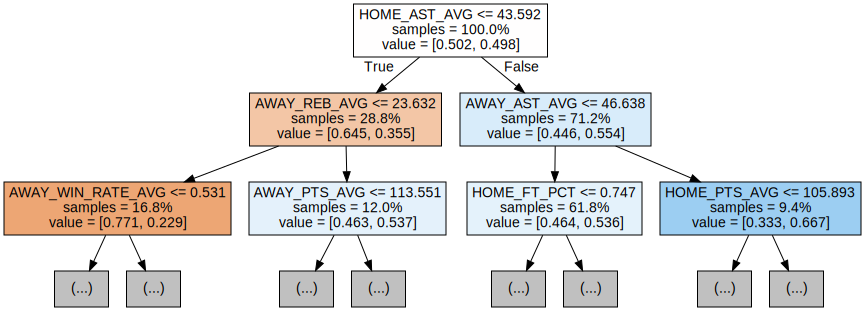

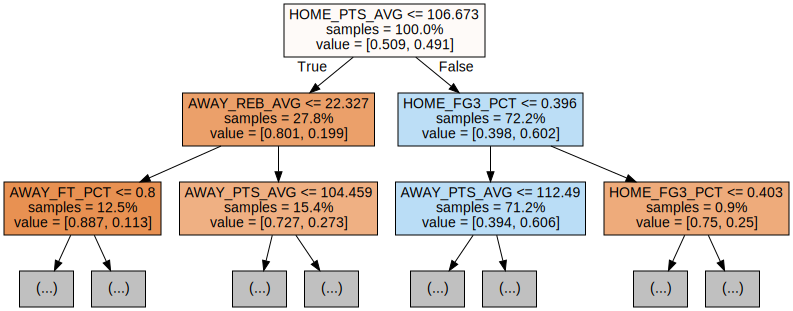

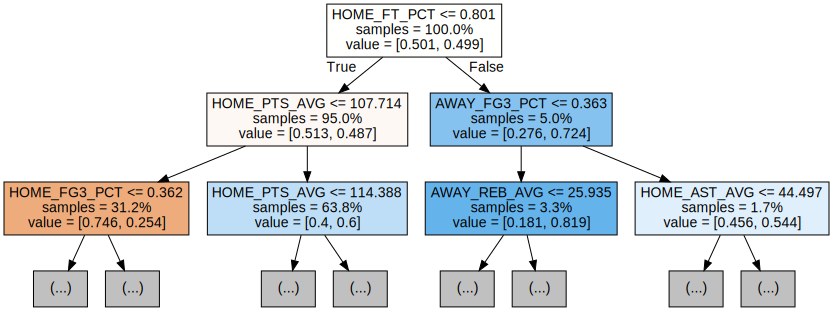

'..\\output_files\\tree.jpg\\tree.jpg'

In [65]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

# Export the first three decision trees from the forest

for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)
    
# export tree to .JPG file in ../output_files
tree = graphviz.Source(dot_data, directory ='../output_files') 
tree.save(filename='tree.jpg', directory='../output_files/tree.jpg')
tree.render(filename='tree',directory='../output_files/tree.jpg',view = True, format='jpg')

# Feature selection

## Correlated features
Show correlation between features on a heatmap graph

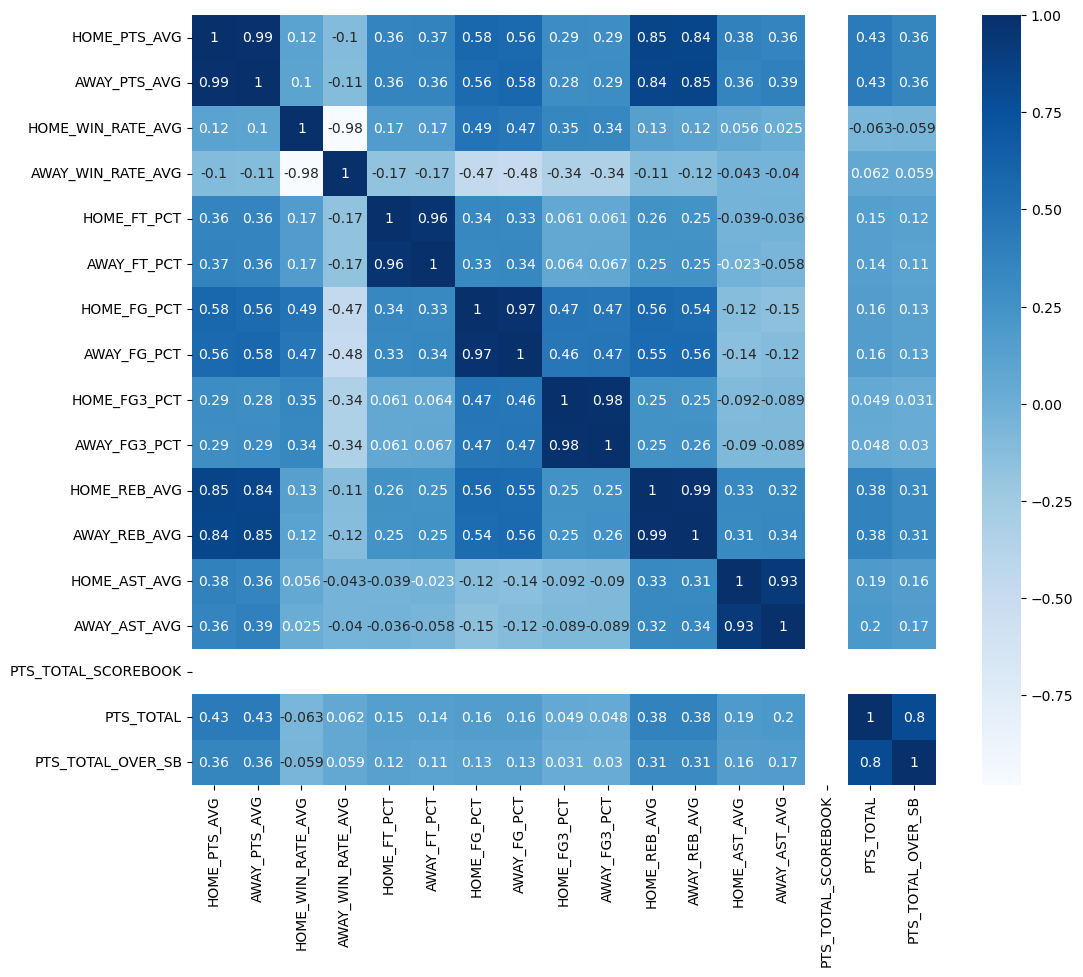

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)
plt.show()

## Anova F-Value
f_classif computes anova f-value between feature for classification tasks.

In [67]:
from sklearn.feature_selection import f_classif

# Create f_classif object to calculate F-value
f_value = f_classif(X, y)

features = list(X.columns)


# Print the name and F-value of each feature
for feature in zip(features, f_value[0]):
    print(feature)

('HOME_PTS_AVG', 790.5825813821302)
('AWAY_PTS_AVG', 787.9870017214732)
('HOME_WIN_RATE_AVG', 19.021343774366013)
('AWAY_WIN_RATE_AVG', 18.894754770502033)
('HOME_FT_PCT', 77.88695271246206)
('AWAY_FT_PCT', 72.06119547551951)
('HOME_FG_PCT', 86.21794066744447)
('AWAY_FG_PCT', 86.40362059368803)
('HOME_FG3_PCT', 5.2097996679049885)
('AWAY_FG3_PCT', 4.867214779399803)
('HOME_REB_AVG', 572.9429947386839)
('AWAY_REB_AVG', 569.136216276531)
('HOME_AST_AVG', 149.9828999872976)
('AWAY_AST_AVG', 162.1688858705659)
('PTS_TOTAL_SCOREBOOK', nan)


C:\Users\addya\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [14] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\addya\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


### Plot F-values on bar chart

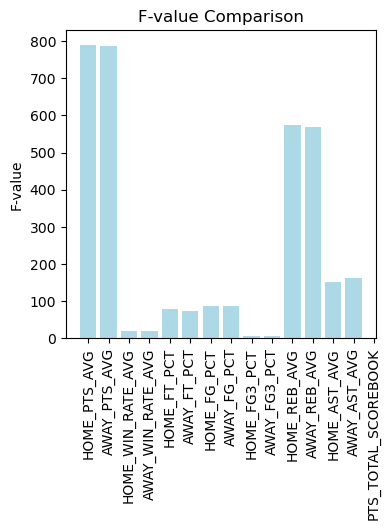

In [68]:
plt.figure(figsize=(4,4))
plt.bar(x=features, height=f_value[0], color='lightblue')
plt.xticks(rotation='vertical')
plt.ylabel('F-value')
plt.title('F-value Comparison')
plt.show()

## Select K best features
F_regression or chi squared

In [69]:
from sklearn.feature_selection import SelectKBest, f_regression, f_classif

all_features = X.columns;

# select top k features
k = 12
selector = SelectKBest(score_func=f_classif, k=k)
X_selected = selector.fit_transform(X, y)

selected_indices = np.argsort(selector.scores_)[::-1][:k]
selected_features = X.columns[selected_indices]

# print selected features
print("\nSelected features using f_regression:")
for val in selected_features:
    print(val)
    
print("\nRemoved features:")
for val in list(set(all_features) - set(selected_features)):
    print(val)
    
# create new X dataframe with only selected features
X_fs = X[selected_features]


Selected features using f_regression:
PTS_TOTAL_SCOREBOOK
HOME_PTS_AVG
AWAY_PTS_AVG
HOME_REB_AVG
AWAY_REB_AVG
AWAY_AST_AVG
HOME_AST_AVG
AWAY_FG_PCT
HOME_FG_PCT
HOME_FT_PCT
AWAY_FT_PCT
HOME_WIN_RATE_AVG

Removed features:
AWAY_FG3_PCT
HOME_FG3_PCT
AWAY_WIN_RATE_AVG


C:\Users\addya\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [14] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\addya\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


### Run tests again
Run tests again using only the selected K best features by <i>f_regression or chi2</i>.
Each model will be trained and cross validated again with only the selected features.

### Re-train and re-test without removed features

In [70]:
k_folds = KFold(n_splits = 5)

X_fs_train, X_fs_test, y_train, y_test = train_test_split(X_fs, y, test_size = 0.25)

rf_fs = RandomForestClassifier(n_estimators = 1600, min_samples_split = 10, min_samples_leaf = 1, max_features = 'sqrt', max_depth = None, bootstrap = True)
rf_fs.fit(X_fs_train, y_train)
rf_fs_pred = rf_fs.predict(X_fs_test)

cvscores_rf_fs = cross_val_score(rf_clf, X_fs, y, cv = k_folds) 

print("Cross Validation Scores: ", cvscores_rf_fs)
print("Average CV Score: ", cvscores_rf_fs.mean())
print("Number of CV Scores used in Average: ", len(cvscores_rf_fs)) 

print("%0.2f accuracy with a standard deviation of %0.2f" % (cvscores_rf_fs.mean(), cvscores_rf_fs.std()))

Cross Validation Scores:  [0.57656827 0.52723915 0.58633426 0.65743306 0.72576177]
Average CV Score:  0.6146673004126162
Number of CV Scores used in Average:  5
0.61 accuracy with a standard deviation of 0.07


In [5]:
import numpy as np

print(np.var(cvscores_rf_fs))

0.004813774029592695
